<a href="https://colab.research.google.com/github/mshojaei77/ML-Journey/blob/main/Linear_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Linear Regression Analysis with pandas, NumPy, and matplotlib: A Deep Dive into OpenAI's Growth Metrics

In this tutorial, we will delve into a more complex and interesting scenario related to OpenAI, focusing on the relationship between research investment and the development of new AI models. We will use pandas for data manipulation, NumPy for numerical operations, and matplotlib for visualization, without relying on scikit-learn.

## Step 1: Importing Libraries

First, let's import the necessary libraries.

In [2]:
!pip install -q pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Loading Data

For this example, we'll create a dataset that simulates the investment in research and the number of new AI models developed by OpenAI over several years.


In [22]:
# Creating a dataset simulating OpenAI's research investment and AI model development
data = {
    'ResearchInvestment': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
    'NewModels': [2, 3, 5, 7, 7, 7, 8, 8, 9, 10]
}
df = pd.DataFrame(data)
df

,ResearchInvestment,NewModels
0,10,2
1,15,3
2,20,5
3,25,7
4,30,7
5,35,7
6,40,8
7,45,8
8,50,9
9,55,10


# Step 3: Exploring Data
Let's take a look at the data to understand its structure.

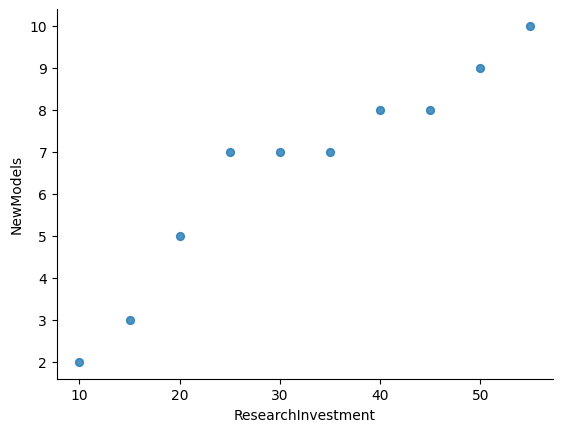

In [23]:
df.plot(kind='scatter', x='ResearchInvestment', y='NewModels', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Step 4: Preparing Data for Training

We need to split our data into features (X) and the target variable (Y).

In [24]:
X = df['ResearchInvestment'].values
Y = df['NewModels'].values


## Step 5: Calculating the Regression Coefficients

We will calculate the slope (m) and the intercept (b) of the regression line using the formulas:

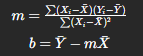

In [25]:
# Calculate the mean of X and Y
X_mean = np.mean(X)
Y_mean = np.mean(Y)
print(f"Mean of X: {X_mean}, Mean of Y: {Y_mean}")

# Calculate the coefficients
numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sum((X - X_mean) ** 2)
m = numerator / denominator
b = Y_mean - m * X_mean

print(f"Slope (m): {m}, Intercept (b): {b}")

Mean of X: 32.5, Mean of Y: 6.6
Slope (m): 0.16, Intercept (b): 1.3999999999999995


## Step 6: Making Predictions

With the coefficients calculated, we can now make predictions.

In [26]:
Y_pred = m * X + b
print(Y_pred)

[ 3.   3.8  4.6  5.4  6.2  7.   7.8  8.6  9.4 10.2]



## Step 7: Evaluating the Model

We'll evaluate the model using Mean Squared Error (MSE).

In [27]:
mse = np.mean((Y - Y_pred) ** 2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.56


## Step 8: Visualizing the Results

Finally, let's visualize the regression line along with the data points.

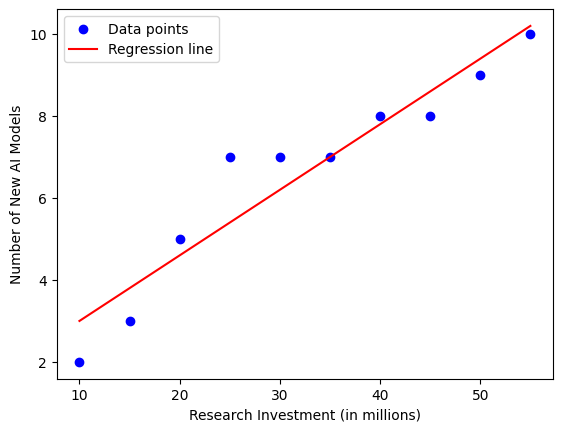

In [28]:
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.xlabel('Research Investment (in millions)')
plt.ylabel('Number of New AI Models')
plt.legend()
plt.show()

## Conclusion

In this tutorial, we explored a more complex scenario related to OpenAI, focusing on the relationship between research investment and the development of new AI models. We used pandas, NumPy, and matplotlib to perform simple linear regression without relying on scikit-learn. This analysis can provide valuable insights into the impact of research investment on AI model development, guiding strategic decision-making within the company.